In [ ]:
#Twitter API
#https://developer.twitter.com/en/docs/platform-overview

In [9]:
#Data cleaning example: US states and population
import pandas as pd
import numpy as np

url1 = 'https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-population.csv'
url2 = 'https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-areas.csv'
url3 = 'https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-abbrevs.csv'

pop = pd.read_csv(url1)
areas = pd.read_csv(url2)
abbrevs = pd.read_csv(url3)

print(pop.head()); print(areas.head());print(abbrevs.head())

print(pop.shape, areas.shape, abbrevs.shape)

  state/region     ages  year  population
0           AL  under18  2012   1117489.0
1           AL    total  2012   4817528.0
2           AL  under18  2010   1130966.0
3           AL    total  2010   4785570.0
4           AL  under18  2011   1125763.0
        state  area (sq. mi)
0     Alabama          52423
1      Alaska         656425
2     Arizona         114006
3    Arkansas          53182
4  California         163707
        state abbreviation
0     Alabama           AL
1      Alaska           AK
2     Arizona           AZ
3    Arkansas           AR
4  California           CA
(2544, 4) (52, 2) (51, 2)


In [10]:
#Merge three datasets
merged = pd.merge(pop, abbrevs, left_on = 'state/region', right_on = 'abbreviation', how = 'outer')
merged = merged.drop('abbreviation', axis =1)
merged

#check null values
merged.isnull().any()
np.sum(merged.isnull())
merged.head()

,state/region,ages,year,population,state
0,AL,under18,2012,1117489.0,Alabama
1,AL,total,2012,4817528.0,Alabama
2,AL,under18,2010,1130966.0,Alabama
3,AL,total,2010,4785570.0,Alabama
4,AL,under18,2011,1125763.0,Alabama


In [11]:
merged.loc[merged['population'].isnull()]
merged.loc[merged['state'].isnull()]['state/region'].unique()

len(merged.loc[merged['state/region']== 'PR']['state'])

merged.loc[merged['state/region']== 'PR','state'] = 'Puerto Rico'
merged.loc[merged['state/region']== 'USA','state'] = 'United States'
merged.isnull().any()

#merged = merged.dropna()
merged.dropna(inplace = True)
merged.isnull().any()
merged.shape

final = pd.merge(merged, areas, on = 'state', how = 'left' )
final.loc[final['area (sq. mi)'].isnull()]

final.dropna(inplace = True)
final

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0
...,...,...,...,...,...,...
2471,PR,under18,2010,896945.0,Puerto Rico,3515.0
2472,PR,under18,2011,869327.0,Puerto Rico,3515.0
2473,PR,total,2011,3686580.0,Puerto Rico,3515.0
2474,PR,under18,2012,841740.0,Puerto Rico,3515.0


In [27]:

data2010 = final.query(" year == 2010 & ages == 'total' ")
#data2010['density'] = data2010['population']/data2010['area (sq. mi)']
data2010

#Directly call .loc method
density = data2010.loc[:, 'population']/data2010.loc[:, 'area (sq. mi)']


#set a new index in this dataset
data2010
newdata = data2010.set_index('state')
newdata.population
newdata['population']

density1 = newdata.population/newdata['area (sq. mi)']
density1.sort_values(ascending = False)

state
District of Columbia    8898.897059
Puerto Rico             1058.665149
New Jersey              1009.253268
Rhode Island             681.339159
Connecticut              645.600649
Massachusetts            621.815538
Maryland                 466.445797
Delaware                 460.445752
New York                 356.094135
Florida                  286.597129
Pennsylvania             275.966651
Ohio                     257.549634
California               228.051342
Illinois                 221.687472
Virginia                 187.622273
Indiana                  178.197831
North Carolina           177.617157
Georgia                  163.409902
Tennessee                150.825298
South Carolina           144.854594
New Hampshire            140.799273
Hawaii                   124.746707
Kentucky                 107.586994
Michigan                 102.015794
Washington                94.557817
Texas                     93.987655
Alabama                   91.287603
Louisiana             

/var/folders/qy/y0brvc213ml_ytp_mz1gqqpc0000gn/T/ipykernel_92032/1597627474.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2010['density'] = data2010['population']/data2010['area (sq. mi)']


<AxesSubplot:xlabel='None,state'>

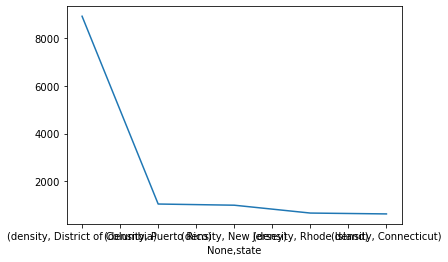

In [34]:
#Pivot table

data2010 = final.query(" year == 2010 & ages == 'total' ")
data2010['density'] = data2010['population']/data2010['area (sq. mi)']


#with groupby method
data2010.groupby(['state','year'])['density'].sum()


#with pivot_table method
data2010.pivot_table('density', index = ['state']).unstack().sort_values(ascending = False).head(5).plot()

In [106]:
%matplotlib inline
import matplotlib.pyplot as plt
#sns.set() # use Seaborn styles

### Common file types:

**1. Excel Spreadsheets (xlsx, xls)** 
- "xlrd" supports old-style Excel files (.xls).
- "openpyxl" supports newer Excel file formats.
- "pyxlsb" supports Binary Excel files.

**2. Text file (txt)** 
<br>
**3. Comma-Separated Values (csv)**
- "csv" allows to read and write tabular data in CSV format.

**4. JavaScript Object Notation (json)**
- "json" supports read, write and parse JSON data.

**5. Extensible Markup Language (xml)**
- xml.etree.ElementTree module: implements a simple and efficient API for reading, writing and parsing XML data

<br><br>
**6. Alternative Pandas methods**
- pd.read_excel
- pd.read_csv
- pd.read_json
- pd.read_xml 
- pd.read_clipboard

In [110]:
#working with xlsx files

import pandas as pd
import numpy as np

#path = r"C:\Users\Desktop\excelData\Art Collection.xlsx" #windows OS
path = r'/Users/yuqianliu/OneDrive - CUNY/CIS3120/Couse document/Data loading/Art Collection.xlsx' #Mac OS

# Read spreadsheet and assign it to arts
arts = pd.read_excel(path, sheet_name = 'Art Collection', index_col = 0)
type(arts)
arts.head()
# View the head of the dataframe

#/Users/yuqianliu/OneDrive - CUNY/CIS3120/Couse document/Data loading/Art Collection.xlsx

,Artist,Artist Gender,Title,Date Acquired,Category,Condition,Location,Appraised Value
ArtID,,,,,,,,
1,Mogan,Male,Red Rock Mountain,2008-03-19,Painting,Excellent,East Pavilion,18000
2,Novarre,Male,Offerings,2008-10-16,Painting,Excellent,East Pavilion,10000
3,Chico,Male,Spring Flowers,2007-07-20,Sculpture,Excellent,East Pavilion,2400
4,Roman,Male,Seeking Shelter,2008-08-08,Sculpture,Excellent,Courtyard,52000
5,DiGrigoro,Male,The Hang,2007-07-16,Painting,Excellent,East Pavilion,8000


In [115]:
# load portion of the art collection data: artist, artist gender, title and appraised value

columns = "A:D, I"

art1 = pd.read_excel('Art Collection.xlsx',sheet_name = 'Art Collection', index_col = 0, 
                    usecols = columns)



,Artist,Artist Gender,Title,Appraised Value
ArtID,,,,
1,Mogan,Male,Red Rock Mountain,18000
2,Novarre,Male,Offerings,10000
3,Chico,Male,Spring Flowers,2400
4,Roman,Male,Seeking Shelter,52000
5,DiGrigoro,Male,The Hang,8000
...,...,...,...,...
111,Rissman,Female,Three Sisters,6500
112,Tidwell,Female,Untitled (man and crucifix),3200
113,Gonzales,Female,Dark Canyon,7500


In [38]:
#import multiple spreadsheets
#import sheet1 and sheet "Art Collection"
art2 = pd.read_excel('Art Collection.xlsx',sheet_name = ['Art Collection','Sheet1'], index_col = 0)

#create df1 and df2 for two worksheets

df1 = art2['Art Collection']
df2 = art2['Sheet1']


#group data and find min, max, median, total appraised value for every artist
artist = df1.groupby('Artist')['Appraised Value'].aggregate([min, max, np.median, sum])
artist

,min,max,median,sum
Artist,,,,
Acconci,800,10000,8000.0,18800
Ames,7544,7544,7544.0,7544
Aserty,14000,110000,53000.0,230000
Baron,27500,27500,27500.0,27500
Bindner,1900,40000,5600.0,53100
...,...,...,...,...
Xie,10000,10000,10000.0,10000
Yasami,20000,20000,20000.0,20000
Zischke,1200,1200,1200.0,1200


In [122]:
#create a new workbook and export the dataframe
#pd.to_excel

#method 1
path = r'/Users/yuqianliu/OneDrive - CUNY/CIS3120/Couse document/Data loading/Aritist.xlsx'

artist.to_excel(path,sheet_name = 'Art')

#method 2
#pd.ExcelWriter




In [39]:
#working with xlsx files
#create a new workbook, enter values

#download openpyxl
#pip install or conda install in your terminal

import openpyxl
#from openpyxl import Workbook()
from openpyxl.utils.dataframe import dataframe_to_rows
from openpyxl.styles import Alignment

## initializing the xlsx
xlsx = openpyxl.Workbook()
#xlsx = Workbook()

## creating an active sheet to enter data
sheet = xlsx.active

## enter data into the A1 and B1 cells in the sheet
sheet['A1'] = 'Course name:'
sheet['B1'] = 'CIS3120'

#merge and center cells from A1 to E1
#enter "Artists" to the merged cell
sheet.merge_cells('A1:E1')
cell = sheet.cell(row=1, column=1) 
cell.value = 'Artist'
cell.alignment = Alignment(horizontal='center', vertical='center')

#export a dataframe to this xlsx file
for i in dataframe_to_rows(artist,index = True, header = True):
    sheet.append(i)

#artist.dataframe_to_rows not working!

## saving the xlsx file using 'save' method
xlsx.save('Example.xlsx')

In [44]:
import csv

#data
#https://github.com/jackiekazil/data-wrangling/tree/master/data/chp3


path = '/Users/yuqianliu/OneDrive - CUNY/CIS3120/Couse document/Data loading/data-text.csv'
csvfile = open(path, 'r')
#reader = csv.reader(csvfile)
reader = csv.DictReader(csvfile)

for i in reader:
    print(i)
    

{'\ufeffIndicator': 'Life expectancy at birth (years)', 'PUBLISH STATES': 'Published', 'Year': '1990', 'WHO region': 'Europe', 'World Bank income group': 'High-income', 'Country': 'Andorra', 'Sex': 'Both sexes', 'Display Value': '77', 'Numeric': '77', 'Low': '', 'High': '', 'Comments': ''}
{'\ufeffIndicator': 'Life expectancy at birth (years)', 'PUBLISH STATES': 'Published', 'Year': '2000', 'WHO region': 'Europe', 'World Bank income group': 'High-income', 'Country': 'Andorra', 'Sex': 'Both sexes', 'Display Value': '80', 'Numeric': '80', 'Low': '', 'High': '', 'Comments': ''}
{'\ufeffIndicator': 'Life expectancy at age 60 (years)', 'PUBLISH STATES': 'Published', 'Year': '2012', 'WHO region': 'Europe', 'World Bank income group': 'High-income', 'Country': 'Andorra', 'Sex': 'Female', 'Display Value': '28', 'Numeric': '28', 'Low': '', 'High': '', 'Comments': ''}
{'\ufeffIndicator': 'Life expectancy at age 60 (years)', 'PUBLISH STATES': 'Published', 'Year': '2000', 'WHO region': 'Europe', 'W

{'\ufeffIndicator': 'Healthy life expectancy (HALE) at birth (years)', 'PUBLISH STATES': 'Published', 'Year': '2012', 'WHO region': 'Americas', 'World Bank income group': 'Upper-middle-income', 'Country': 'Cuba', 'Sex': 'Both sexes', 'Display Value': '67', 'Numeric': '67', 'Low': '', 'High': '', 'Comments': ''}
{'\ufeffIndicator': 'Healthy life expectancy (HALE) at birth (years)', 'PUBLISH STATES': 'Published', 'Year': '2000', 'WHO region': 'Europe', 'World Bank income group': 'High-income', 'Country': 'Cyprus', 'Sex': 'Male', 'Display Value': '69', 'Numeric': '69', 'Low': '', 'High': '', 'Comments': ''}
{'\ufeffIndicator': 'Healthy life expectancy (HALE) at birth (years)', 'PUBLISH STATES': 'Published', 'Year': '2000', 'WHO region': 'Europe', 'World Bank income group': 'High-income', 'Country': 'Czech Republic', 'Sex': 'Both sexes', 'Display Value': '66', 'Numeric': '66', 'Low': '', 'High': '', 'Comments': ''}
{'\ufeffIndicator': 'Healthy life expectancy (HALE) at birth (years)', 'PUB

{'\ufeffIndicator': 'Healthy life expectancy (HALE) at birth (years)', 'PUBLISH STATES': 'Published', 'Year': '2000', 'WHO region': 'Africa', 'World Bank income group': 'Low-income', 'Country': 'Liberia', 'Sex': 'Female', 'Display Value': '44', 'Numeric': '44', 'Low': '', 'High': '', 'Comments': ''}
{'\ufeffIndicator': 'Healthy life expectancy (HALE) at birth (years)', 'PUBLISH STATES': 'Published', 'Year': '2000', 'WHO region': 'South-East Asia', 'World Bank income group': 'Lower-middle-income', 'Country': 'Sri Lanka', 'Sex': 'Male', 'Display Value': '57', 'Numeric': '57', 'Low': '', 'High': '', 'Comments': ''}
{'\ufeffIndicator': 'Healthy life expectancy (HALE) at birth (years)', 'PUBLISH STATES': 'Published', 'Year': '2000', 'WHO region': 'South-East Asia', 'World Bank income group': 'Lower-middle-income', 'Country': 'Sri Lanka', 'Sex': 'Female', 'Display Value': '65', 'Numeric': '65', 'Low': '', 'High': '', 'Comments': ''}
{'\ufeffIndicator': 'Healthy life expectancy (HALE) at birt

In [46]:
#import csv file with read_csv
import pandas as pd
url = 'https://raw.githubusercontent.com/jackiekazil/data-wrangling/master/data/chp3/data-text.csv'
df = pd.read_csv(url, index_col = 0)

df


,PUBLISH STATES,Year,WHO region,World Bank income group,Country,Sex,Display Value,Numeric,Low,High,Comments
Indicator,,,,,,,,,,,
Life expectancy at birth (years),Published,1990,Europe,High-income,Andorra,Both sexes,77,77.0,NaN,NaN,NaN
Life expectancy at birth (years),Published,2000,Europe,High-income,Andorra,Both sexes,80,80.0,NaN,NaN,NaN
Life expectancy at age 60 (years),Published,2012,Europe,High-income,Andorra,Female,28,28.0,NaN,NaN,NaN
Life expectancy at age 60 (years),Published,2000,Europe,High-income,Andorra,Both sexes,23,23.0,NaN,NaN,NaN
Life expectancy at birth (years),Published,2012,Eastern Mediterranean,High-income,United Arab Emirates,Female,78,78.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
Healthy life expectancy (HALE) at birth (years),Published,2012,Western Pacific,Lower-middle-income,Samoa,Female,66,66.0,NaN,NaN,NaN
Healthy life expectancy (HALE) at birth (years),Published,2012,Eastern Mediterranean,Low-income,Yemen,Both sexes,54,54.0,NaN,NaN,NaN
Healthy life expectancy (HALE) at birth (years),Published,2000,Africa,Upper-middle-income,South Africa,Male,49,49.0,NaN,NaN,NaN


In [47]:
#JSON example

jstr='''[
          {
           "id": "1", 
           "name": "Tim", 
           "age": "20"
          },
         
          {
           "id": "2", 
           "name": "Kim", 
           "age": "21"
          },
         
          {
           "id": "3", 
           "name": "Juan", 
           "age": "20"
          }
         ]'''



In [54]:
import json

#read json data with json.loads
jp=json.loads(jstr)

#check type and length of the data
type(jp)
len(jp)

#find all names and ages
for i in jp:
    print(i['name'], i['age'])

    

Tim 20
Kim 21
Juan 20


In [59]:
#JSON file 'data-text.json'
import json
#json_data = open(path + '/data-text.json').read()
json_data = open('data-text.json').read()
data = json.loads(json_data)

for i in data:
    print(i['Indicator'])

Life expectancy at birth (years)
Life expectancy at birth (years)
Life expectancy at age 60 (years)
Life expectancy at age 60 (years)
Life expectancy at birth (years)
Life expectancy at birth (years)
Life expectancy at age 60 (years)
Life expectancy at age 60 (years)
Life expectancy at birth (years)
Life expectancy at birth (years)
Life expectancy at birth (years)
Life expectancy at birth (years)
Life expectancy at age 60 (years)
Life expectancy at birth (years)
Life expectancy at birth (years)
Life expectancy at birth (years)
Life expectancy at age 60 (years)
Life expectancy at birth (years)
Life expectancy at age 60 (years)
Life expectancy at birth (years)
Life expectancy at age 60 (years)
Life expectancy at age 60 (years)
Life expectancy at age 60 (years)
Life expectancy at age 60 (years)
Life expectancy at age 60 (years)
Life expectancy at birth (years)
Life expectancy at age 60 (years)
Life expectancy at age 60 (years)
Life expectancy at birth (years)
Life expectancy at birth (yea

Healthy life expectancy (HALE) at birth (years)
Healthy life expectancy (HALE) at birth (years)
Healthy life expectancy (HALE) at birth (years)
Healthy life expectancy (HALE) at birth (years)
Healthy life expectancy (HALE) at birth (years)
Healthy life expectancy (HALE) at birth (years)
Healthy life expectancy (HALE) at birth (years)
Healthy life expectancy (HALE) at birth (years)
Healthy life expectancy (HALE) at birth (years)
Healthy life expectancy (HALE) at birth (years)
Healthy life expectancy (HALE) at birth (years)
Healthy life expectancy (HALE) at birth (years)
Healthy life expectancy (HALE) at birth (years)
Healthy life expectancy (HALE) at birth (years)
Healthy life expectancy (HALE) at birth (years)
Healthy life expectancy (HALE) at birth (years)
Healthy life expectancy (HALE) at birth (years)
Healthy life expectancy (HALE) at birth (years)
Healthy life expectancy (HALE) at birth (years)
Healthy life expectancy (HALE) at birth (years)
Healthy life expectancy (HALE) at birth 

In [60]:
#import json file with read_json
url = 'https://raw.githubusercontent.com/jackiekazil/data-wrangling/master/data/chp3/data-text.json'
df_json = pd.read_json(url)

df_json

,Indicator,PUBLISH STATES,Year,WHO region,World Bank income group,Country,Sex,Display Value,Numeric,Low,High,Comments
0,Life expectancy at birth (years),Published,1990,Europe,High-income,Andorra,Both sexes,77,77,,,
1,Life expectancy at birth (years),Published,2000,Europe,High-income,Andorra,Both sexes,80,80,,,
2,Life expectancy at age 60 (years),Published,2012,Europe,High-income,Andorra,Female,28,28,,,
3,Life expectancy at age 60 (years),Published,2000,Europe,High-income,Andorra,Both sexes,23,23,,,
4,Life expectancy at birth (years),Published,2012,Eastern Mediterranean,High-income,United Arab Emirates,Female,78,78,,,
...,...,...,...,...,...,...,...,...,...,...,...,...
4651,Healthy life expectancy (HALE) at birth (years),Published,2012,Western Pacific,Lower-middle-income,Samoa,Female,66,66,,,
4652,Healthy life expectancy (HALE) at birth (years),Published,2012,Eastern Mediterranean,Low-income,Yemen,Both sexes,54,54,,,
4653,Healthy life expectancy (HALE) at birth (years),Published,2000,Africa,Upper-middle-income,South Africa,Male,49,49,,,
4654,Healthy life expectancy (HALE) at birth (years),Published,2000,Africa,Low-income,Zambia,Both sexes,36,36,,,


In [ ]:
#XML data
#Data values can be stored in two places in an XML file: either in between two tags, as in <Display>46</Display>.
#or as an attribute of a tag, as in <Dim Category="COUNTRY" Code="SOM"/>
#XML formatting allows us to store more than one attribute in each node.
#Smiliar to HTML codes

In [61]:
xmldata = '''<?xml version='1.0' encoding='utf-8'?>
<data xmlns="http://example.com">
<row>
<shape>square</shape>
<degrees>360</degrees>
<sides>4.0</sides>
</row>
<row>
<shape>circle</shape>
<degrees>360</degrees>
<sides/>
</row>
<row>
<shape>triangle</shape>
<degrees>180</degrees>
<sides>3.0</sides>
</row>
</data>'''

In [62]:
#parse xml data with read_xml
xml = pd.read_xml(xmldata)
xml

,shape,degrees,sides
0,square,360,4.0
1,circle,360,NaN
2,triangle,180,3.0


In [63]:
#import xml file with read_xml
url = 'https://raw.githubusercontent.com/jackiekazil/data-wrangling/master/data/chp3/data-text.xml'
xml = pd.read_xml(url)

xml

,Name,Value,Display,Dataset,Attribute,Dimension,Observation
0,format,xml,None,NaN,NaN,NaN,NaN
1,baseurl,http://apps.who.int/gho/athena/data/,None,NaN,NaN,NaN,NaN
2,filter,COUNTRY:*;REGION:AFR;REGION:AMR;REGION:SEAR;RE...,None,NaN,NaN,NaN,NaN
3,asof,2014-10-22 15:12:28.0,None,NaN,NaN,NaN,NaN
4,metadata,active,None,NaN,NaN,NaN,NaN
5,target,"GHO/WHOSIS_000002,WHOSIS_000001,WHOSIS_000015",None,NaN,NaN,NaN,NaN
6,None,None,(c) World Health Organization,NaN,NaN,NaN,NaN
7,None,None,The information in this database is provided a...,NaN,NaN,NaN,NaN
8,None,None,None,NaN,NaN,NaN,NaN
9,None,None,None,NaN,NaN,NaN,NaN


In [13]:
from xml.etree import ElementTree as ET
#Parse XML document ('data-text.xml')into element tree
tree = ET.parse('data-text.xml') #no file path needed here
root = tree.getroot() #return to the root/outmost tag in this XML element tree
root

<Element 'GHO' at 0x7fd26801b2c0>

In [18]:
data = root.find('Data')

all_data = []
for observation in data:
    record = {}
    for item in observation:
        #print(item.attrib.keys())
        lookup_key = list(item.attrib.keys())[0]
        rec_key = item.attrib[lookup_key]
        print(lookup_key)
        print(rec_key)
    

Category
PUBLISHSTATE
Category
YEAR
Category
SEX
Category
GHO
Category
REGION
Category
COUNTRY
Category
WORLDBANKINCOMEGROUP
Numeric
77.00000
Category
WORLDBANKINCOMEGROUP
Category
YEAR
Category
SEX
Category
COUNTRY
Category
REGION
Category
GHO
Category
PUBLISHSTATE
Numeric
80.00000
Category
GHO
Category
COUNTRY
Category
YEAR
Category
REGION
Category
SEX
Category
WORLDBANKINCOMEGROUP
Category
PUBLISHSTATE
Numeric
28.00000
Category
PUBLISHSTATE
Category
COUNTRY
Category
GHO
Category
SEX
Category
YEAR
Category
WORLDBANKINCOMEGROUP
Category
REGION
Numeric
23.00000
Category
SEX
Category
REGION
Category
GHO
Category
COUNTRY
Category
WORLDBANKINCOMEGROUP
Category
YEAR
Category
PUBLISHSTATE
Numeric
78.00000
Category
COUNTRY
Category
REGION
Category
SEX
Category
GHO
Category
WORLDBANKINCOMEGROUP
Category
YEAR
Category
PUBLISHSTATE
Numeric
72.00000
Category
PUBLISHSTATE
Category
COUNTRY
Category
SEX
Category
GHO
Category
WORLDBANKINCOMEGROUP
Category
YEAR
Category
REGION
Numeric
17.00000
Catego

Category
WORLDBANKINCOMEGROUP
Category
SEX
Category
COUNTRY
Category
PUBLISHSTATE
Numeric
53.00000
Category
PUBLISHSTATE
Category
GHO
Category
YEAR
Category
REGION
Category
WORLDBANKINCOMEGROUP
Category
COUNTRY
Category
SEX
Numeric
15.00000
Category
COUNTRY
Category
SEX
Category
GHO
Category
REGION
Category
WORLDBANKINCOMEGROUP
Category
YEAR
Category
PUBLISHSTATE
Numeric
16.00000
Category
PUBLISHSTATE
Category
WORLDBANKINCOMEGROUP
Category
YEAR
Category
SEX
Category
GHO
Category
COUNTRY
Category
REGION
Numeric
48.00000
Category
SEX
Category
WORLDBANKINCOMEGROUP
Category
GHO
Category
YEAR
Category
COUNTRY
Category
REGION
Category
PUBLISHSTATE
Numeric
49.00000
Category
PUBLISHSTATE
Category
GHO
Category
WORLDBANKINCOMEGROUP
Category
SEX
Category
REGION
Category
YEAR
Category
COUNTRY
Numeric
58.00000
Category
SEX
Category
GHO
Category
WORLDBANKINCOMEGROUP
Category
COUNTRY
Category
REGION
Category
YEAR
Category
PUBLISHSTATE
Numeric
15.00000
Category
REGION
Category
GHO
Category
WORLDBANKIN

Category
WORLDBANKINCOMEGROUP
Category
REGION
Numeric
74.00000
Category
PUBLISHSTATE
Category
COUNTRY
Category
SEX
Category
WORLDBANKINCOMEGROUP
Category
REGION
Category
GHO
Category
YEAR
Numeric
75.00000
Category
PUBLISHSTATE
Category
REGION
Category
COUNTRY
Category
SEX
Category
YEAR
Category
WORLDBANKINCOMEGROUP
Category
GHO
Numeric
18.00000
Category
PUBLISHSTATE
Category
YEAR
Category
COUNTRY
Category
GHO
Category
SEX
Category
WORLDBANKINCOMEGROUP
Category
REGION
Numeric
17.00000
Category
PUBLISHSTATE
Category
GHO
Category
SEX
Category
YEAR
Category
WORLDBANKINCOMEGROUP
Category
REGION
Category
COUNTRY
Numeric
61.00000
Category
SEX
Category
WORLDBANKINCOMEGROUP
Category
GHO
Category
YEAR
Category
REGION
Category
COUNTRY
Category
PUBLISHSTATE
Numeric
58.00000
Category
PUBLISHSTATE
Category
YEAR
Category
SEX
Category
WORLDBANKINCOMEGROUP
Category
REGION
Category
GHO
Category
COUNTRY
Numeric
68.00000
Category
PUBLISHSTATE
Category
WORLDBANKINCOMEGROUP
Category
GHO
Category
SEX
Categor

PUBLISHSTATE
Numeric
78.00000
Category
PUBLISHSTATE
Category
COUNTRY
Category
WORLDBANKINCOMEGROUP
Category
YEAR
Category
SEX
Category
REGION
Category
GHO
Numeric
24.00000
Category
REGION
Category
GHO
Category
COUNTRY
Category
WORLDBANKINCOMEGROUP
Category
YEAR
Category
SEX
Category
PUBLISHSTATE
Numeric
24.00000
Category
PUBLISHSTATE
Category
REGION
Category
COUNTRY
Category
GHO
Category
YEAR
Category
SEX
Category
WORLDBANKINCOMEGROUP
Numeric
83.00000
Category
PUBLISHSTATE
Category
YEAR
Category
WORLDBANKINCOMEGROUP
Category
REGION
Category
SEX
Category
GHO
Category
COUNTRY
Numeric
78.00000
Category
PUBLISHSTATE
Category
COUNTRY
Category
WORLDBANKINCOMEGROUP
Category
REGION
Category
GHO
Category
YEAR
Category
SEX
Numeric
23.00000
Category
PUBLISHSTATE
Category
YEAR
Category
COUNTRY
Category
GHO
Category
SEX
Category
REGION
Category
WORLDBANKINCOMEGROUP
Numeric
26.00000
Category
YEAR
Category
WORLDBANKINCOMEGROUP
Category
SEX
Category
GHO
Category
COUNTRY
Category
REGION
Category
PUBLIS

YEAR
Category
COUNTRY
Category
WORLDBANKINCOMEGROUP
Category
GHO
Category
SEX
Category
REGION
Category
PUBLISHSTATE
Numeric
18.00000
Category
GHO
Category
REGION
Category
COUNTRY
Category
YEAR
Category
SEX
Category
WORLDBANKINCOMEGROUP
Category
PUBLISHSTATE
Numeric
51.00000
Category
GHO
Category
YEAR
Category
SEX
Category
WORLDBANKINCOMEGROUP
Category
REGION
Category
COUNTRY
Category
PUBLISHSTATE
Numeric
57.00000
Category
REGION
Category
GHO
Category
WORLDBANKINCOMEGROUP
Category
COUNTRY
Category
YEAR
Category
SEX
Category
PUBLISHSTATE
Numeric
22.00000
Category
SEX
Category
YEAR
Category
COUNTRY
Category
WORLDBANKINCOMEGROUP
Category
REGION
Category
GHO
Category
PUBLISHSTATE
Numeric
64.00000
Category
REGION
Category
COUNTRY
Category
WORLDBANKINCOMEGROUP
Category
GHO
Category
SEX
Category
YEAR
Category
PUBLISHSTATE
Numeric
59.00000
Category
REGION
Category
SEX
Category
WORLDBANKINCOMEGROUP
Category
GHO
Category
COUNTRY
Category
YEAR
Category
PUBLISHSTATE
Numeric
15.00000
Category
PUBLIS

Category
WORLDBANKINCOMEGROUP
Category
SEX
Category
GHO
Category
COUNTRY
Category
PUBLISHSTATE
Numeric
65.00000
Category
YEAR
Category
GHO
Category
WORLDBANKINCOMEGROUP
Category
SEX
Category
COUNTRY
Category
REGION
Category
PUBLISHSTATE
Numeric
16.00000
Category
SEX
Category
COUNTRY
Category
GHO
Category
YEAR
Category
WORLDBANKINCOMEGROUP
Category
REGION
Category
PUBLISHSTATE
Numeric
58.00000
Category
GHO
Category
REGION
Category
YEAR
Category
SEX
Category
WORLDBANKINCOMEGROUP
Category
COUNTRY
Category
PUBLISHSTATE
Numeric
16.00000
Category
SEX
Category
COUNTRY
Category
WORLDBANKINCOMEGROUP
Category
YEAR
Category
GHO
Category
REGION
Category
PUBLISHSTATE
Numeric
72.00000
Category
YEAR
Category
SEX
Category
GHO
Category
WORLDBANKINCOMEGROUP
Category
COUNTRY
Category
REGION
Category
PUBLISHSTATE
Numeric
64.00000
Category
GHO
Category
YEAR
Category
REGION
Category
WORLDBANKINCOMEGROUP
Category
COUNTRY
Category
SEX
Category
PUBLISHSTATE
Numeric
71.00000
Category
YEAR
Category
REGION
Catego

Numeric
69.00000
Category
WORLDBANKINCOMEGROUP
Category
GHO
Category
REGION
Category
YEAR
Category
SEX
Category
COUNTRY
Category
PUBLISHSTATE
Numeric
76.00000
Category
COUNTRY
Category
GHO
Category
WORLDBANKINCOMEGROUP
Category
REGION
Category
SEX
Category
YEAR
Category
PUBLISHSTATE
Numeric
18.00000
Category
WORLDBANKINCOMEGROUP
Category
YEAR
Category
COUNTRY
Category
GHO
Category
REGION
Category
SEX
Category
PUBLISHSTATE
Numeric
78.00000
Category
PUBLISHSTATE
Category
YEAR
Category
REGION
Category
SEX
Category
GHO
Category
COUNTRY
Category
WORLDBANKINCOMEGROUP
Numeric
85.00000
Category
PUBLISHSTATE
Category
SEX
Category
COUNTRY
Category
GHO
Category
REGION
Category
WORLDBANKINCOMEGROUP
Category
YEAR
Numeric
75.00000
Category
PUBLISHSTATE
Category
WORLDBANKINCOMEGROUP
Category
GHO
Category
REGION
Category
COUNTRY
Category
YEAR
Category
SEX
Numeric
23.00000
Category
COUNTRY
Category
WORLDBANKINCOMEGROUP
Category
YEAR
Category
SEX
Category
REGION
Category
GHO
Category
PUBLISHSTATE
Numeri

69.00000
Category
GHO
Category
WORLDBANKINCOMEGROUP
Category
REGION
Category
COUNTRY
Category
YEAR
Category
SEX
Category
PUBLISHSTATE
Numeric
17.00000
Category
COUNTRY
Category
YEAR
Category
REGION
Category
SEX
Category
WORLDBANKINCOMEGROUP
Category
GHO
Category
PUBLISHSTATE
Numeric
21.00000
Category
GHO
Category
COUNTRY
Category
SEX
Category
WORLDBANKINCOMEGROUP
Category
YEAR
Category
REGION
Category
PUBLISHSTATE
Numeric
18.00000
Category
WORLDBANKINCOMEGROUP
Category
REGION
Category
GHO
Category
YEAR
Category
COUNTRY
Category
SEX
Category
PUBLISHSTATE
Numeric
19.00000
Category
SEX
Category
COUNTRY
Category
REGION
Category
YEAR
Category
WORLDBANKINCOMEGROUP
Category
GHO
Category
PUBLISHSTATE
Numeric
60.00000
Category
GHO
Category
REGION
Category
WORLDBANKINCOMEGROUP
Category
SEX
Category
YEAR
Category
COUNTRY
Category
PUBLISHSTATE
Numeric
53.00000
Category
YEAR
Category
SEX
Category
GHO
Category
COUNTRY
Category
REGION
Category
WORLDBANKINCOMEGROUP
Category
PUBLISHSTATE
Numeric
60.000

SEX
Category
GHO
Category
COUNTRY
Category
YEAR
Numeric
74.00000
Category
PUBLISHSTATE
Category
COUNTRY
Category
GHO
Category
REGION
Category
YEAR
Category
SEX
Category
WORLDBANKINCOMEGROUP
Numeric
21.00000
Category
SEX
Category
REGION
Category
YEAR
Category
COUNTRY
Category
GHO
Category
WORLDBANKINCOMEGROUP
Category
PUBLISHSTATE
Numeric
25.00000
Category
PUBLISHSTATE
Category
WORLDBANKINCOMEGROUP
Category
GHO
Category
YEAR
Category
COUNTRY
Category
REGION
Category
SEX
Numeric
79.00000
Category
PUBLISHSTATE
Category
YEAR
Category
COUNTRY
Category
REGION
Category
GHO
Category
SEX
Category
WORLDBANKINCOMEGROUP
Numeric
81.00000
Category
PUBLISHSTATE
Category
WORLDBANKINCOMEGROUP
Category
YEAR
Category
COUNTRY
Category
REGION
Category
SEX
Category
GHO
Numeric
79.00000
Category
PUBLISHSTATE
Category
YEAR
Category
REGION
Category
COUNTRY
Category
WORLDBANKINCOMEGROUP
Category
GHO
Category
SEX
Numeric
23.00000
Category
PUBLISHSTATE
Category
WORLDBANKINCOMEGROUP
Category
YEAR
Category
COUNTRY


Category
WORLDBANKINCOMEGROUP
Category
PUBLISHSTATE
Numeric
66.00000
Category
PUBLISHSTATE
Category
YEAR
Category
REGION
Category
WORLDBANKINCOMEGROUP
Category
COUNTRY
Category
GHO
Category
SEX
Numeric
69.00000
Category
GHO
Category
YEAR
Category
SEX
Category
REGION
Category
COUNTRY
Category
WORLDBANKINCOMEGROUP
Category
PUBLISHSTATE
Numeric
67.00000
Category
SEX
Category
WORLDBANKINCOMEGROUP
Category
GHO
Category
YEAR
Category
COUNTRY
Category
REGION
Category
PUBLISHSTATE
Numeric
69.00000
Category
YEAR
Category
COUNTRY
Category
WORLDBANKINCOMEGROUP
Category
GHO
Category
SEX
Category
REGION
Category
PUBLISHSTATE
Numeric
66.00000
Category
YEAR
Category
COUNTRY
Category
GHO
Category
SEX
Category
WORLDBANKINCOMEGROUP
Category
REGION
Category
PUBLISHSTATE
Numeric
70.00000
Category
PUBLISHSTATE
Category
SEX
Category
COUNTRY
Category
WORLDBANKINCOMEGROUP
Category
GHO
Category
YEAR
Category
REGION
Numeric
63.00000
Category
PUBLISHSTATE
Category
GHO
Category
SEX
Category
COUNTRY
Category
REGIO

Category
SEX
Category
COUNTRY
Category
REGION
Category
YEAR
Category
GHO
Category
WORLDBANKINCOMEGROUP
Numeric
15.00000
Category
WORLDBANKINCOMEGROUP
Category
YEAR
Category
COUNTRY
Category
REGION
Category
GHO
Category
SEX
Category
PUBLISHSTATE
Numeric
72.00000
Category
PUBLISHSTATE
Category
YEAR
Category
GHO
Category
WORLDBANKINCOMEGROUP
Category
COUNTRY
Category
REGION
Category
SEX
Numeric
75.00000
Category
PUBLISHSTATE
Category
SEX
Category
YEAR
Category
COUNTRY
Category
WORLDBANKINCOMEGROUP
Category
REGION
Category
GHO
Numeric
18.00000
Category
PUBLISHSTATE
Category
REGION
Category
YEAR
Category
SEX
Category
COUNTRY
Category
WORLDBANKINCOMEGROUP
Category
GHO
Numeric
20.00000
Category
PUBLISHSTATE
Category
GHO
Category
YEAR
Category
WORLDBANKINCOMEGROUP
Category
COUNTRY
Category
REGION
Category
SEX
Numeric
66.00000
Category
SEX
Category
GHO
Category
YEAR
Category
COUNTRY
Category
WORLDBANKINCOMEGROUP
Category
REGION
Category
PUBLISHSTATE
Numeric
71.00000
Category
GHO
Category
REGION

SEX
Category
COUNTRY
Category
REGION
Category
YEAR
Category
WORLDBANKINCOMEGROUP
Numeric
63.00000
Category
PUBLISHSTATE
Category
REGION
Category
YEAR
Category
SEX
Category
COUNTRY
Category
WORLDBANKINCOMEGROUP
Category
GHO
Numeric
65.00000
Category
PUBLISHSTATE
Category
GHO
Category
REGION
Category
COUNTRY
Category
YEAR
Category
SEX
Category
WORLDBANKINCOMEGROUP
Numeric
63.00000
Category
GHO
Category
YEAR
Category
SEX
Category
REGION
Category
COUNTRY
Category
WORLDBANKINCOMEGROUP
Category
PUBLISHSTATE
Numeric
71.00000
Category
COUNTRY
Category
GHO
Category
YEAR
Category
SEX
Category
REGION
Category
WORLDBANKINCOMEGROUP
Category
PUBLISHSTATE
Numeric
56.00000
Category
SEX
Category
COUNTRY
Category
YEAR
Category
WORLDBANKINCOMEGROUP
Category
GHO
Category
REGION
Category
PUBLISHSTATE
Numeric
58.00000
Category
YEAR
Category
SEX
Category
REGION
Category
WORLDBANKINCOMEGROUP
Category
GHO
Category
COUNTRY
Category
PUBLISHSTATE
Numeric
41.00000
Category
WORLDBANKINCOMEGROUP
Category
YEAR
Catego

COUNTRY
Category
WORLDBANKINCOMEGROUP
Category
SEX
Category
GHO
Category
REGION
Category
PUBLISHSTATE
Numeric
44.00000
Category
PUBLISHSTATE
Category
SEX
Category
WORLDBANKINCOMEGROUP
Category
COUNTRY
Category
REGION
Category
YEAR
Category
GHO
Numeric
59.00000
Category
PUBLISHSTATE
Category
WORLDBANKINCOMEGROUP
Category
REGION
Category
YEAR
Category
COUNTRY
Category
GHO
Category
SEX
Numeric
65.00000
Category
YEAR
Category
REGION
Category
SEX
Category
GHO
Category
WORLDBANKINCOMEGROUP
Category
COUNTRY
Category
PUBLISHSTATE
Numeric
56.00000
Category
WORLDBANKINCOMEGROUP
Category
GHO
Category
SEX
Category
COUNTRY
Category
YEAR
Category
REGION
Category
PUBLISHSTATE
Numeric
60.00000
Category
SEX
Category
GHO
Category
REGION
Category
YEAR
Category
COUNTRY
Category
WORLDBANKINCOMEGROUP
Category
PUBLISHSTATE
Numeric
61.00000
Category
PUBLISHSTATE
Category
YEAR
Category
WORLDBANKINCOMEGROUP
Category
COUNTRY
Category
GHO
Category
SEX
Category
REGION
Numeric
64.00000
Category
PUBLISHSTATE
Categor

PUBLISHSTATE
Category
WORLDBANKINCOMEGROUP
Category
SEX
Category
COUNTRY
Category
GHO
Category
YEAR
Category
REGION
Numeric
72.00000
Category
PUBLISHSTATE
Category
REGION
Category
SEX
Category
WORLDBANKINCOMEGROUP
Category
GHO
Category
YEAR
Category
COUNTRY
Numeric
24.00000
Category
PUBLISHSTATE
Category
SEX
Category
GHO
Category
YEAR
Category
COUNTRY
Category
WORLDBANKINCOMEGROUP
Category
REGION
Numeric
56.00000
Category
PUBLISHSTATE
Category
REGION
Category
YEAR
Category
GHO
Category
SEX
Category
WORLDBANKINCOMEGROUP
Category
COUNTRY
Numeric
62.00000
Category
WORLDBANKINCOMEGROUP
Category
COUNTRY
Category
SEX
Category
YEAR
Category
REGION
Category
GHO
Category
PUBLISHSTATE
Numeric
49.00000
Category
PUBLISHSTATE
Category
COUNTRY
Category
YEAR
Category
WORLDBANKINCOMEGROUP
Category
REGION
Category
SEX
Category
GHO
Numeric
60.00000
Category
PUBLISHSTATE
Category
YEAR
Category
WORLDBANKINCOMEGROUP
Category
GHO
Category
REGION
Category
COUNTRY
Category
SEX
Numeric
64.00000
Category
PUBLIS

Category
SEX
Category
COUNTRY
Category
WORLDBANKINCOMEGROUP
Category
GHO
Category
PUBLISHSTATE
Numeric
65.00000
Category
PUBLISHSTATE
Category
YEAR
Category
GHO
Category
COUNTRY
Category
WORLDBANKINCOMEGROUP
Category
SEX
Category
REGION
Numeric
63.00000
Category
SEX
Category
GHO
Category
REGION
Category
WORLDBANKINCOMEGROUP
Category
YEAR
Category
COUNTRY
Category
PUBLISHSTATE
Numeric
53.00000
Category
YEAR
Category
SEX
Category
REGION
Category
COUNTRY
Category
GHO
Category
WORLDBANKINCOMEGROUP
Category
PUBLISHSTATE
Numeric
65.00000
Category
PUBLISHSTATE
Category
REGION
Category
YEAR
Category
COUNTRY
Category
GHO
Category
SEX
Category
WORLDBANKINCOMEGROUP
Numeric
68.00000
Category
SEX
Category
WORLDBANKINCOMEGROUP
Category
REGION
Category
YEAR
Category
GHO
Category
COUNTRY
Category
PUBLISHSTATE
Numeric
65.00000
Category
GHO
Category
COUNTRY
Category
WORLDBANKINCOMEGROUP
Category
SEX
Category
YEAR
Category
REGION
Category
PUBLISHSTATE
Numeric
64.00000
Category
YEAR
Category
COUNTRY
Categ

Category
PUBLISHSTATE
Category
WORLDBANKINCOMEGROUP
Category
YEAR
Category
GHO
Category
SEX
Category
REGION
Category
COUNTRY
Numeric
24.00000
Category
WORLDBANKINCOMEGROUP
Category
SEX
Category
GHO
Category
REGION
Category
COUNTRY
Category
YEAR
Category
PUBLISHSTATE
Numeric
21.00000
Category
REGION
Category
COUNTRY
Category
WORLDBANKINCOMEGROUP
Category
SEX
Category
YEAR
Category
GHO
Category
PUBLISHSTATE
Numeric
15.00000
Category
PUBLISHSTATE
Category
GHO
Category
COUNTRY
Category
WORLDBANKINCOMEGROUP
Category
SEX
Category
YEAR
Category
REGION
Numeric
72.00000
Category
PUBLISHSTATE
Category
YEAR
Category
REGION
Category
GHO
Category
WORLDBANKINCOMEGROUP
Category
SEX
Category
COUNTRY
Numeric
79.00000
Category
YEAR
Category
WORLDBANKINCOMEGROUP
Category
COUNTRY
Category
REGION
Category
GHO
Category
SEX
Category
PUBLISHSTATE
Numeric
20.00000
Category
WORLDBANKINCOMEGROUP
Category
YEAR
Category
SEX
Category
GHO
Category
COUNTRY
Category
REGION
Category
PUBLISHSTATE
Numeric
23.00000
Catego

16.00000
Category
PUBLISHSTATE
Category
GHO
Category
SEX
Category
REGION
Category
YEAR
Category
COUNTRY
Category
WORLDBANKINCOMEGROUP
Numeric
66.00000
Category
PUBLISHSTATE
Category
SEX
Category
REGION
Category
GHO
Category
YEAR
Category
WORLDBANKINCOMEGROUP
Category
COUNTRY
Numeric
17.00000
Category
SEX
Category
YEAR
Category
WORLDBANKINCOMEGROUP
Category
REGION
Category
COUNTRY
Category
GHO
Category
PUBLISHSTATE
Numeric
55.00000
Category
WORLDBANKINCOMEGROUP
Category
YEAR
Category
REGION
Category
GHO
Category
SEX
Category
COUNTRY
Category
PUBLISHSTATE
Numeric
15.00000
Category
PUBLISHSTATE
Category
GHO
Category
WORLDBANKINCOMEGROUP
Category
YEAR
Category
SEX
Category
COUNTRY
Category
REGION
Numeric
16.00000
Category
PUBLISHSTATE
Category
SEX
Category
REGION
Category
COUNTRY
Category
YEAR
Category
WORLDBANKINCOMEGROUP
Category
GHO
Numeric
70.00000
Category
PUBLISHSTATE
Category
YEAR
Category
WORLDBANKINCOMEGROUP
Category
SEX
Category
REGION
Category
COUNTRY
Category
GHO
Numeric
73.000

Category
SEX
Category
GHO
Category
YEAR
Category
COUNTRY
Category
WORLDBANKINCOMEGROUP
Category
PUBLISHSTATE
Numeric
82.00000
Category
GHO
Category
SEX
Category
REGION
Category
WORLDBANKINCOMEGROUP
Category
COUNTRY
Category
YEAR
Category
PUBLISHSTATE
Numeric
21.00000
Category
YEAR
Category
REGION
Category
GHO
Category
COUNTRY
Category
SEX
Category
WORLDBANKINCOMEGROUP
Category
PUBLISHSTATE
Numeric
22.00000
Category
SEX
Category
COUNTRY
Category
REGION
Category
GHO
Category
WORLDBANKINCOMEGROUP
Category
YEAR
Category
PUBLISHSTATE
Numeric
24.00000
Category
REGION
Category
WORLDBANKINCOMEGROUP
Category
COUNTRY
Category
SEX
Category
YEAR
Category
GHO
Category
PUBLISHSTATE
Numeric
76.00000
Category
REGION
Category
WORLDBANKINCOMEGROUP
Category
GHO
Category
SEX
Category
YEAR
Category
COUNTRY
Category
PUBLISHSTATE
Numeric
22.00000
Category
WORLDBANKINCOMEGROUP
Category
GHO
Category
YEAR
Category
REGION
Category
SEX
Category
COUNTRY
Category
PUBLISHSTATE
Numeric
25.00000
Category
YEAR
Category

Category
COUNTRY
Category
WORLDBANKINCOMEGROUP
Category
SEX
Numeric
16.00000
Category
YEAR
Category
GHO
Category
REGION
Category
SEX
Category
WORLDBANKINCOMEGROUP
Category
COUNTRY
Category
PUBLISHSTATE
Numeric
16.00000
Category
SEX
Category
WORLDBANKINCOMEGROUP
Category
REGION
Category
COUNTRY
Category
GHO
Category
YEAR
Category
PUBLISHSTATE
Numeric
15.00000
Category
WORLDBANKINCOMEGROUP
Category
SEX
Category
GHO
Category
YEAR
Category
COUNTRY
Category
REGION
Category
PUBLISHSTATE
Numeric
14.00000
Category
WORLDBANKINCOMEGROUP
Category
REGION
Category
YEAR
Category
SEX
Category
GHO
Category
COUNTRY
Category
PUBLISHSTATE
Numeric
15.00000
Category
GHO
Category
WORLDBANKINCOMEGROUP
Category
YEAR
Category
COUNTRY
Category
REGION
Category
SEX
Category
PUBLISHSTATE
Numeric
15.00000
Category
REGION
Category
SEX
Category
WORLDBANKINCOMEGROUP
Category
COUNTRY
Category
GHO
Category
YEAR
Category
PUBLISHSTATE
Numeric
15.00000
Category
PUBLISHSTATE
Category
YEAR
Category
COUNTRY
Category
GHO
Categ

Category
COUNTRY
Category
REGION
Category
GHO
Category
WORLDBANKINCOMEGROUP
Category
YEAR
Category
SEX
Category
PUBLISHSTATE
Numeric
15.00000
Category
GHO
Category
YEAR
Category
COUNTRY
Category
REGION
Category
SEX
Category
WORLDBANKINCOMEGROUP
Category
PUBLISHSTATE
Numeric
59.00000
Category
GHO
Category
REGION
Category
WORLDBANKINCOMEGROUP
Category
YEAR
Category
SEX
Category
COUNTRY
Category
PUBLISHSTATE
Numeric
62.00000
Category
SEX
Category
COUNTRY
Category
WORLDBANKINCOMEGROUP
Category
YEAR
Category
REGION
Category
GHO
Category
PUBLISHSTATE
Numeric
12.00000
Category
YEAR
Category
REGION
Category
WORLDBANKINCOMEGROUP
Category
SEX
Category
COUNTRY
Category
GHO
Category
PUBLISHSTATE
Numeric
13.00000
Category
SEX
Category
GHO
Category
YEAR
Category
COUNTRY
Category
REGION
Category
WORLDBANKINCOMEGROUP
Category
PUBLISHSTATE
Numeric
71.00000
Category
REGION
Category
COUNTRY
Category
YEAR
Category
WORLDBANKINCOMEGROUP
Category
SEX
Category
GHO
Category
PUBLISHSTATE
Numeric
75.00000
Catego

PUBLISHSTATE
Category
YEAR
Category
COUNTRY
Category
WORLDBANKINCOMEGROUP
Category
REGION
Category
SEX
Category
GHO
Numeric
16.00000
Category
SEX
Category
YEAR
Category
WORLDBANKINCOMEGROUP
Category
GHO
Category
COUNTRY
Category
REGION
Category
PUBLISHSTATE
Numeric
17.00000
Category
YEAR
Category
WORLDBANKINCOMEGROUP
Category
COUNTRY
Category
GHO
Category
SEX
Category
REGION
Category
PUBLISHSTATE
Numeric
71.00000
Category
COUNTRY
Category
REGION
Category
GHO
Category
SEX
Category
YEAR
Category
WORLDBANKINCOMEGROUP
Category
PUBLISHSTATE
Numeric
74.00000
Category
COUNTRY
Category
SEX
Category
GHO
Category
YEAR
Category
WORLDBANKINCOMEGROUP
Category
REGION
Category
PUBLISHSTATE
Numeric
19.00000
Category
SEX
Category
WORLDBANKINCOMEGROUP
Category
GHO
Category
YEAR
Category
COUNTRY
Category
REGION
Category
PUBLISHSTATE
Numeric
20.00000
Category
YEAR
Category
SEX
Category
WORLDBANKINCOMEGROUP
Category
COUNTRY
Category
GHO
Category
REGION
Category
PUBLISHSTATE
Numeric
22.00000
Category
SEX
Ca

Category
COUNTRY
Category
REGION
Category
GHO
Category
WORLDBANKINCOMEGROUP
Category
PUBLISHSTATE
Numeric
38.00000
Category
WORLDBANKINCOMEGROUP
Category
YEAR
Category
SEX
Category
REGION
Category
COUNTRY
Category
GHO
Category
PUBLISHSTATE
Numeric
66.00000
Category
REGION
Category
COUNTRY
Category
SEX
Category
YEAR
Category
GHO
Category
WORLDBANKINCOMEGROUP
Category
PUBLISHSTATE
Numeric
59.00000
Category
COUNTRY
Category
GHO
Category
YEAR
Category
WORLDBANKINCOMEGROUP
Category
SEX
Category
REGION
Category
PUBLISHSTATE
Numeric
41.00000
Category
GHO
Category
COUNTRY
Category
SEX
Category
WORLDBANKINCOMEGROUP
Category
REGION
Category
YEAR
Category
PUBLISHSTATE
Numeric
63.00000
Category
YEAR
Category
GHO
Category
REGION
Category
WORLDBANKINCOMEGROUP
Category
SEX
Category
COUNTRY
Category
PUBLISHSTATE
Numeric
64.00000
Category
SEX
Category
WORLDBANKINCOMEGROUP
Category
COUNTRY
Category
GHO
Category
REGION
Category
YEAR
Category
PUBLISHSTATE
Numeric
70.00000
Category
COUNTRY
Category
SEX
Cat

GHO
Category
WORLDBANKINCOMEGROUP
Category
PUBLISHSTATE
Numeric
19.00000
Category
PUBLISHSTATE
Category
GHO
Category
WORLDBANKINCOMEGROUP
Category
YEAR
Category
SEX
Category
COUNTRY
Category
REGION
Numeric
70.00000
Category
COUNTRY
Category
WORLDBANKINCOMEGROUP
Category
GHO
Category
REGION
Category
SEX
Category
YEAR
Category
PUBLISHSTATE
Numeric
18.00000
Category
GHO
Category
YEAR
Category
REGION
Category
COUNTRY
Category
WORLDBANKINCOMEGROUP
Category
SEX
Category
PUBLISHSTATE
Numeric
19.00000
Category
PUBLISHSTATE
Category
WORLDBANKINCOMEGROUP
Category
COUNTRY
Category
REGION
Category
SEX
Category
YEAR
Category
GHO
Numeric
21.00000
Category
COUNTRY
Category
REGION
Category
WORLDBANKINCOMEGROUP
Category
GHO
Category
SEX
Category
YEAR
Category
PUBLISHSTATE
Numeric
71.00000
Category
YEAR
Category
REGION
Category
SEX
Category
COUNTRY
Category
WORLDBANKINCOMEGROUP
Category
GHO
Category
PUBLISHSTATE
Numeric
71.00000
Category
COUNTRY
Category
YEAR
Category
SEX
Category
REGION
Category
GHO
Ca

52.00000
Category
PUBLISHSTATE
Category
WORLDBANKINCOMEGROUP
Category
REGION
Category
SEX
Category
COUNTRY
Category
YEAR
Category
GHO
Numeric
61.00000
Category
PUBLISHSTATE
Category
COUNTRY
Category
REGION
Category
YEAR
Category
WORLDBANKINCOMEGROUP
Category
SEX
Category
GHO
Numeric
66.00000
Category
PUBLISHSTATE
Category
YEAR
Category
REGION
Category
GHO
Category
SEX
Category
COUNTRY
Category
WORLDBANKINCOMEGROUP
Numeric
65.00000
Category
PUBLISHSTATE
Category
YEAR
Category
COUNTRY
Category
GHO
Category
WORLDBANKINCOMEGROUP
Category
SEX
Category
REGION
Numeric
41.00000
Category
PUBLISHSTATE
Category
SEX
Category
WORLDBANKINCOMEGROUP
Category
GHO
Category
YEAR
Category
REGION
Category
COUNTRY
Numeric
68.00000
Category
PUBLISHSTATE
Category
SEX
Category
REGION
Category
GHO
Category
YEAR
Category
WORLDBANKINCOMEGROUP
Category
COUNTRY
Numeric
61.00000
Category
PUBLISHSTATE
Category
REGION
Category
SEX
Category
GHO
Category
WORLDBANKINCOMEGROUP
Category
YEAR
Category
COUNTRY
Numeric
70.000

YEAR
Category
REGION
Category
COUNTRY
Category
GHO
Category
SEX
Category
WORLDBANKINCOMEGROUP
Numeric
82.00000
Category
COUNTRY
Category
SEX
Category
WORLDBANKINCOMEGROUP
Category
GHO
Category
REGION
Category
YEAR
Category
PUBLISHSTATE
Numeric
85.00000
Category
PUBLISHSTATE
Category
YEAR
Category
WORLDBANKINCOMEGROUP
Category
GHO
Category
SEX
Category
COUNTRY
Category
REGION
Numeric
25.00000
Category
PUBLISHSTATE
Category
YEAR
Category
GHO
Category
SEX
Category
WORLDBANKINCOMEGROUP
Category
REGION
Category
COUNTRY
Numeric
27.00000
Category
PUBLISHSTATE
Category
YEAR
Category
GHO
Category
COUNTRY
Category
WORLDBANKINCOMEGROUP
Category
SEX
Category
REGION
Numeric
22.00000
Category
PUBLISHSTATE
Category
YEAR
Category
WORLDBANKINCOMEGROUP
Category
COUNTRY
Category
GHO
Category
REGION
Category
SEX
Numeric
79.00000
Category
PUBLISHSTATE
Category
YEAR
Category
REGION
Category
COUNTRY
Category
SEX
Category
WORLDBANKINCOMEGROUP
Category
GHO
Numeric
80.00000
Category
PUBLISHSTATE
Category
SEX
Ca

Category
YEAR
Category
PUBLISHSTATE
Numeric
51.00000
Category
YEAR
Category
COUNTRY
Category
WORLDBANKINCOMEGROUP
Category
SEX
Category
GHO
Category
REGION
Category
PUBLISHSTATE
Numeric
63.00000
Category
COUNTRY
Category
REGION
Category
SEX
Category
WORLDBANKINCOMEGROUP
Category
GHO
Category
YEAR
Category
PUBLISHSTATE
Numeric
17.00000
Category
YEAR
Category
REGION
Category
SEX
Category
COUNTRY
Category
WORLDBANKINCOMEGROUP
Category
GHO
Category
PUBLISHSTATE
Numeric
16.00000
Category
REGION
Category
SEX
Category
GHO
Category
YEAR
Category
WORLDBANKINCOMEGROUP
Category
COUNTRY
Category
PUBLISHSTATE
Numeric
56.00000
Category
COUNTRY
Category
YEAR
Category
GHO
Category
REGION
Category
SEX
Category
WORLDBANKINCOMEGROUP
Category
PUBLISHSTATE
Numeric
49.00000
Category
SEX
Category
WORLDBANKINCOMEGROUP
Category
YEAR
Category
GHO
Category
REGION
Category
COUNTRY
Category
PUBLISHSTATE
Numeric
57.00000
Category
COUNTRY
Category
GHO
Category
REGION
Category
SEX
Category
YEAR
Category
WORLDBANKINCO

Category
GHO
Numeric
18.00000
Category
COUNTRY
Category
WORLDBANKINCOMEGROUP
Category
SEX
Category
GHO
Category
REGION
Category
YEAR
Category
PUBLISHSTATE
Numeric
71.00000
Category
SEX
Category
REGION
Category
GHO
Category
WORLDBANKINCOMEGROUP
Category
YEAR
Category
COUNTRY
Category
PUBLISHSTATE
Numeric
62.00000
Category
WORLDBANKINCOMEGROUP
Category
COUNTRY
Category
GHO
Category
REGION
Category
YEAR
Category
SEX
Category
PUBLISHSTATE
Numeric
68.00000
Category
COUNTRY
Category
SEX
Category
GHO
Category
WORLDBANKINCOMEGROUP
Category
REGION
Category
YEAR
Category
PUBLISHSTATE
Numeric
18.00000
Category
GHO
Category
WORLDBANKINCOMEGROUP
Category
YEAR
Category
SEX
Category
COUNTRY
Category
REGION
Category
PUBLISHSTATE
Numeric
16.00000
Category
COUNTRY
Category
SEX
Category
GHO
Category
YEAR
Category
REGION
Category
WORLDBANKINCOMEGROUP
Category
PUBLISHSTATE
Numeric
74.00000
Category
SEX
Category
COUNTRY
Category
WORLDBANKINCOMEGROUP
Category
GHO
Category
YEAR
Category
REGION
Category
PUBLIS

PUBLISHSTATE
Numeric
61.00000
Category
YEAR
Category
COUNTRY
Category
SEX
Category
GHO
Category
REGION
Category
WORLDBANKINCOMEGROUP
Category
PUBLISHSTATE
Numeric
68.00000
Category
COUNTRY
Category
YEAR
Category
GHO
Category
WORLDBANKINCOMEGROUP
Category
SEX
Category
REGION
Category
PUBLISHSTATE
Numeric
63.00000
Category
SEX
Category
WORLDBANKINCOMEGROUP
Category
GHO
Category
COUNTRY
Category
YEAR
Category
REGION
Category
PUBLISHSTATE
Numeric
61.00000
Category
PUBLISHSTATE
Category
REGION
Category
SEX
Category
COUNTRY
Category
WORLDBANKINCOMEGROUP
Category
YEAR
Category
GHO
Numeric
63.00000
Category
REGION
Category
WORLDBANKINCOMEGROUP
Category
YEAR
Category
SEX
Category
GHO
Category
COUNTRY
Category
PUBLISHSTATE
Numeric
66.00000
Category
COUNTRY
Category
YEAR
Category
WORLDBANKINCOMEGROUP
Category
REGION
Category
GHO
Category
SEX
Category
PUBLISHSTATE
Numeric
60.00000
Category
COUNTRY
Category
WORLDBANKINCOMEGROUP
Category
GHO
Category
YEAR
Category
REGION
Category
SEX
Category
PUBLIS

REGION
Category
WORLDBANKINCOMEGROUP
Category
SEX
Category
GHO
Category
COUNTRY
Numeric
60.00000
Category
PUBLISHSTATE
Category
COUNTRY
Category
REGION
Category
WORLDBANKINCOMEGROUP
Category
SEX
Category
GHO
Category
YEAR
Numeric
61.00000
Category
PUBLISHSTATE
Category
YEAR
Category
GHO
Category
SEX
Category
REGION
Category
COUNTRY
Category
WORLDBANKINCOMEGROUP
Numeric
53.00000
Category
SEX
Category
WORLDBANKINCOMEGROUP
Category
GHO
Category
COUNTRY
Category
REGION
Category
YEAR
Category
PUBLISHSTATE
Numeric
51.00000
Category
YEAR
Category
GHO
Category
SEX
Category
COUNTRY
Category
WORLDBANKINCOMEGROUP
Category
REGION
Category
PUBLISHSTATE
Numeric
37.00000
Category
YEAR
Category
COUNTRY
Category
GHO
Category
REGION
Category
WORLDBANKINCOMEGROUP
Category
SEX
Category
PUBLISHSTATE
Numeric
50.00000
Category
PUBLISHSTATE
Category
COUNTRY
Category
WORLDBANKINCOMEGROUP
Category
YEAR
Category
SEX
Category
GHO
Category
REGION
Numeric
49.00000


In [23]:
data = root.find('Data')

all_data = []
for observation in data:
    record = {}
    for item in observation:
        lookup_key = list(item.attrib.keys())[0]
        rec_key = item.attrib[lookup_key]
        if lookup_key == 'Numeric':
            rec_key = 'NUMERIC'
            rec_value = item.attrib['Numeric']
        else:
            rec_key = item.attrib[lookup_key]
            rec_value = item.attrib['Code']
            record[rec_key] = rec_value
        all_data.append(record)
        
#print(all_data[:10])
import pandas as pd
df = pd.DataFrame(all_data)
df

print(all_data[:10])

[{'PUBLISHSTATE': 'PUBLISHED', 'YEAR': '1990', 'SEX': 'BTSX', 'GHO': 'WHOSIS_000001', 'REGION': 'EUR', 'COUNTRY': 'AND', 'WORLDBANKINCOMEGROUP': 'WB_HI'}, {'PUBLISHSTATE': 'PUBLISHED', 'YEAR': '1990', 'SEX': 'BTSX', 'GHO': 'WHOSIS_000001', 'REGION': 'EUR', 'COUNTRY': 'AND', 'WORLDBANKINCOMEGROUP': 'WB_HI'}, {'PUBLISHSTATE': 'PUBLISHED', 'YEAR': '1990', 'SEX': 'BTSX', 'GHO': 'WHOSIS_000001', 'REGION': 'EUR', 'COUNTRY': 'AND', 'WORLDBANKINCOMEGROUP': 'WB_HI'}, {'PUBLISHSTATE': 'PUBLISHED', 'YEAR': '1990', 'SEX': 'BTSX', 'GHO': 'WHOSIS_000001', 'REGION': 'EUR', 'COUNTRY': 'AND', 'WORLDBANKINCOMEGROUP': 'WB_HI'}, {'PUBLISHSTATE': 'PUBLISHED', 'YEAR': '1990', 'SEX': 'BTSX', 'GHO': 'WHOSIS_000001', 'REGION': 'EUR', 'COUNTRY': 'AND', 'WORLDBANKINCOMEGROUP': 'WB_HI'}, {'PUBLISHSTATE': 'PUBLISHED', 'YEAR': '1990', 'SEX': 'BTSX', 'GHO': 'WHOSIS_000001', 'REGION': 'EUR', 'COUNTRY': 'AND', 'WORLDBANKINCOMEGROUP': 'WB_HI'}, {'PUBLISHSTATE': 'PUBLISHED', 'YEAR': '1990', 'SEX': 'BTSX', 'GHO': 'WHOSIS

In [24]:
#working with text file: append, write, read, processing
# Write data into a file
# Create a text file and list courses (one course per line) in the file

fob=open('courses.txt', 'w')
fob.write('Courses: Data Analytics Concentration') 
fob.write('Programming for Analytics')
fob.write('Data Mining')
fob.write('Data warehousing')
fob.close()

In [28]:
# fix error; role of newline?
fob=open('courses.txt', 'w')
fob.write('Courses: Data Analytics Concentration\n') 
fob.write('Programming for Analytics\n')
fob.write('Data Mining\n')
fob.write('Data warehousing\n')
fob.close()

In [34]:
# Append data to file

fob=open('courses.txt', 'w') 
# what happens if you use 'w'?
fob.write('Data Warehousing new\n')
fob.write('Data Warehousing new\n')
fob.close()

In [35]:
#read contents in the file
fob = open('courses.txt','r')
print(fob.read())
fob.close()

Data Warehousing new
Data Warehousing new

